# Importing necessary libraries and dataset

Dataset link: https://www.kaggle.com/code/analystoleksandra/marketing-analytics-customer-segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
food=pd.read_csv('/content/drive/MyDrive/ifood_df.csv')

In [3]:
df=food.copy(deep=True)

# Data Exploration

In [4]:
df.head(100)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,87195.0,0,0,35,217,76,690,50,26,38,...,0,0,0,0,1,0,0,1059,1021,0
96,24594.0,1,0,94,1,3,6,10,0,9,...,1,0,0,1,0,0,0,20,11,0
97,49096.0,1,1,15,144,1,32,2,1,7,...,0,0,0,0,1,0,0,180,173,0
98,52413.0,0,2,56,295,106,271,75,98,65,...,0,0,0,0,1,0,0,845,780,0


In [5]:
df.shape

(2205, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [8]:
df[['Z_CostContact', 'Z_Revenue']].nunique()

Z_CostContact    1
Z_Revenue        1
dtype: int64

In [9]:
df['education_2n Cycle'].value_counts()

education_2n Cycle
0    2007
1     198
Name: count, dtype: int64

In [10]:
df['education_Graduation'].value_counts()

education_Graduation
1    1113
0    1092
Name: count, dtype: int64

# Data Cleaning

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.shape

(2021, 39)

In [13]:
df.drop(df[['Z_CostContact', 'Z_Revenue']],axis=1,inplace=True)

<Axes: ylabel='MntTotal'>

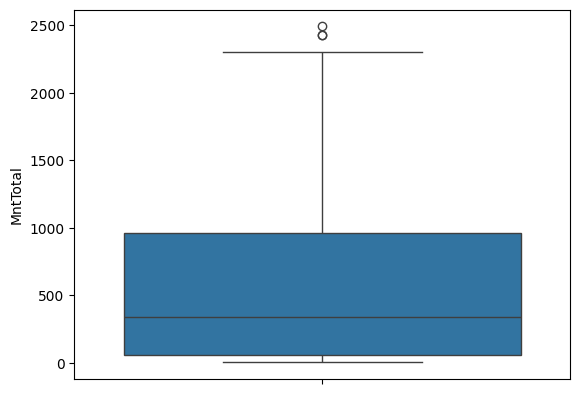

In [14]:
sns.boxplot(df['MntTotal'])

since we use K-means clustering so it is better to remove outliers

In [15]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[((df['MntTotal'] >= lower_bound) & (df['MntTotal'] <= upper_bound))]


# Data Analysis

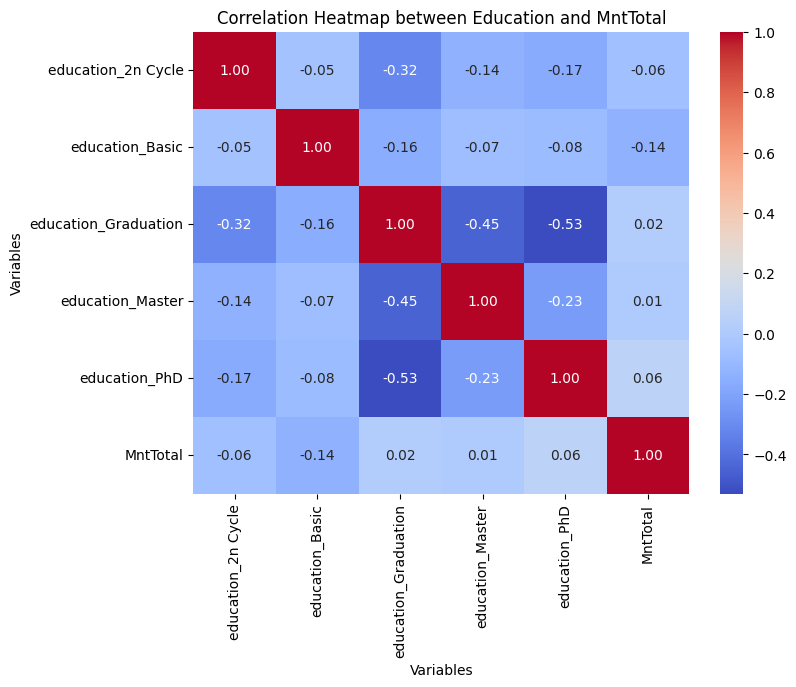

In [16]:
# Compute the correlation matrix
correlation_matrix = df[['education_2n Cycle', 'education_Basic', 'education_Graduation','education_Master', 'education_PhD', 'MntTotal']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Education and MntTotal')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

Clearly we can see that education details doesn't effect the total amount spent so lets ignore the education related columns i.e.,'education_2n Cycle', 'education_Basic', 'education_Graduation','education_Master', 'education_PhD'

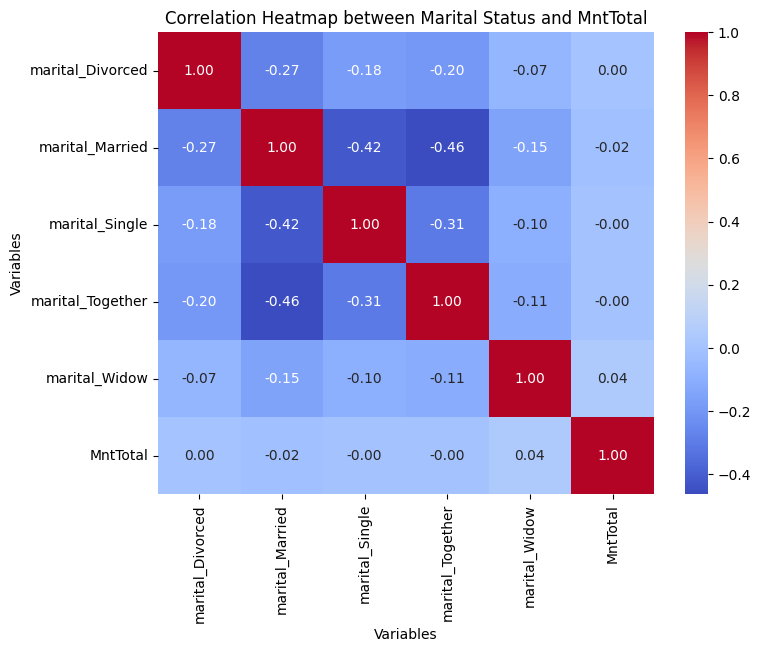

In [17]:
# Compute the correlation matrix
correlation_matrix = df[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'MntTotal']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Marital Status and MntTotal')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


From above certainly we can see that martial status columns too doesn't contribute much to the MntTotal.so lets ignore them.

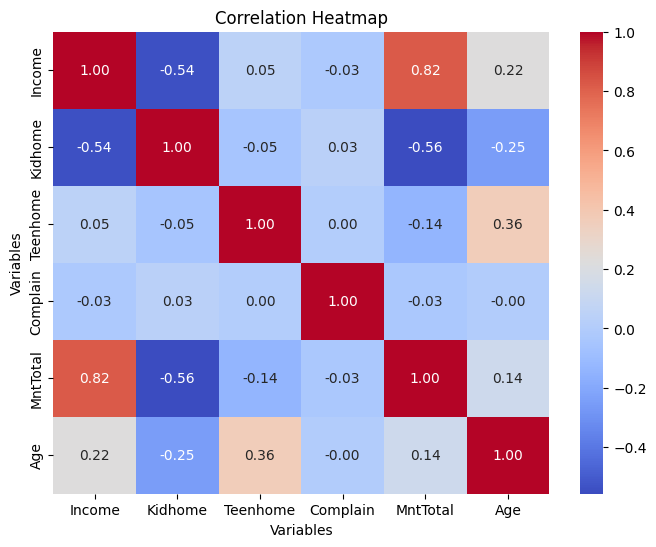

In [18]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Income', 'Kidhome', 'Teenhome', 'Complain', 'MntTotal','Age']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

A clear high correlation is seen between Income,Kidhome with MntTotal.

# Feature Engineering

In [19]:
def conversion_to_Educational_status(df):
  if df['education_Basic']==1 or df['education_Graduation']==1 or df['education_Master']==1 or df['education_2n Cycle']==1 or df['education_PhD']==1:
    return 1
  else:
    return 0
df['Education_status']=df.apply(conversion_to_Educational_status,axis=1)

In [20]:
df['Education_status'].value_counts()

Education_status
1    2018
Name: count, dtype: int64

A new feature Education_status is created to in the hope that it may influence the amount spent but every one in the dataset have atleast basic education so lets ignore Education_status too.

In [21]:
def conversion_to_Relationship_status(df):
    if df['marital_Married']==1 or df['marital_Together']==1 :
        return 1
    else:
        return 0

# Apply the function to create the new column 'Relationship_status'
df['Relationship_status'] = df.apply(conversion_to_Relationship_status, axis=1)


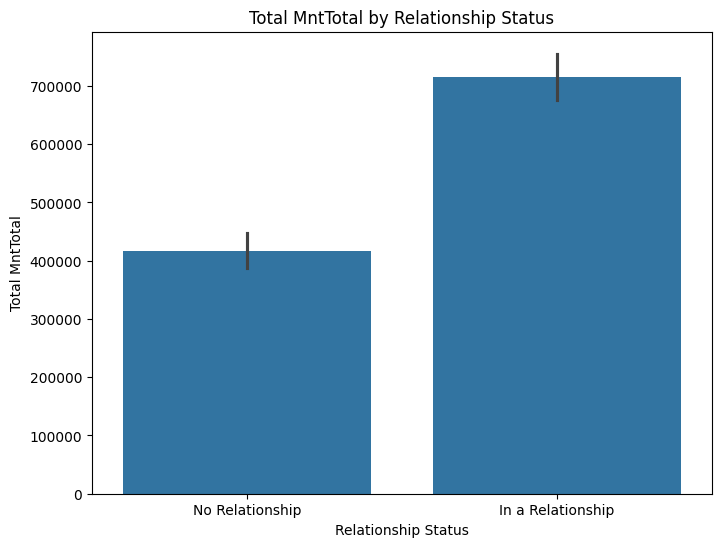

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Relationship_status', y='MntTotal', estimator=sum)
plt.title('Total MntTotal by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Total MntTotal')
plt.xticks(ticks=[0, 1], labels=['No Relationship', 'In a Relationship'])
plt.show()

We can clearly observe that relation status is clearly effecting MntTotal so lets consider them.

# Customer Segmentation

Now we segment customer based on their Income, kidhome, relationship_status, Age and MntTotal using K-Means Clustering.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant columns
data = df[['Income', 'Kidhome', 'Relationship_status', 'Age', 'MntTotal']]

# Optional: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [24]:
from sklearn.decomposition import PCA
n_components = 2  #reducing to 2 components
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_data)

# Create a DataFrame with the transformed data
pca_df = pd.DataFrame(data=transformed_data, columns=[f'PC{i+1}' for i in range(n_components)])

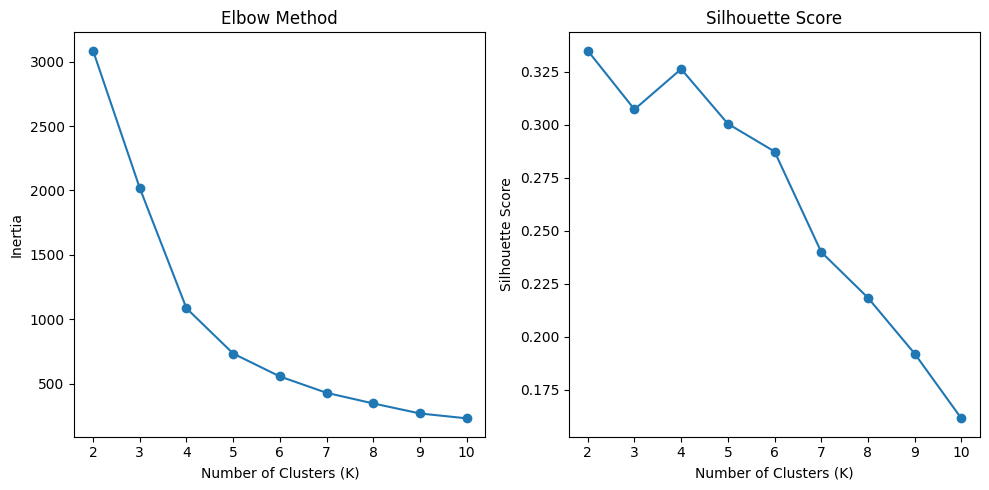

In [25]:
# Initialize lists to store silhouette scores and inertia (within-cluster sum of squares)
silhouette_scores = []
inertia_values = []

# Range of clusters to try
k_values = range(2, 11)  # Trying K from 2 to 10

# Calculate silhouette scores and inertia for each value of K
for k in k_values:
    # Train K-Means clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

    # Calculate inertia
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

From the graphs we can see that 4 is the optimal number of cluster needed to be choosed.

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(transformed_data)
# Get cluster labels for each data point
cluster_labels = kmeans.labels_
# Add cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels

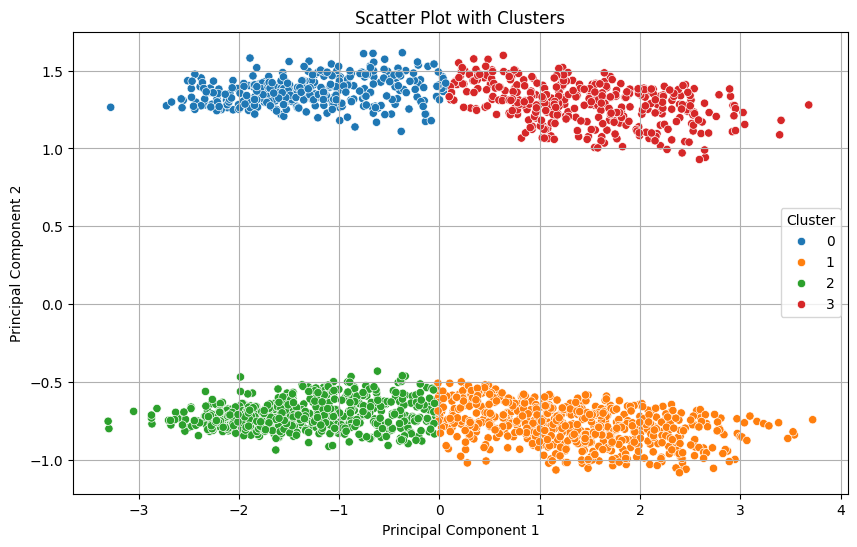

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Scatter Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


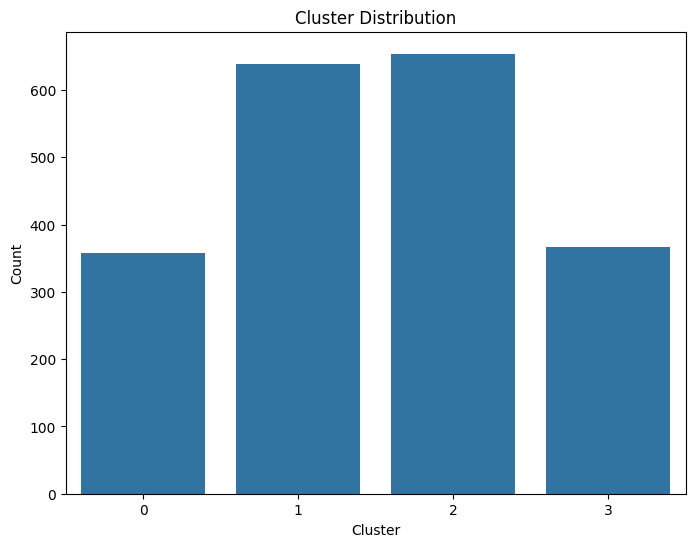

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=pca_df, x='Cluster')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


So we have segmented the customers into 4 cluster using K-Means Clustering algorithm.